In [1]:
import time
import csv
from csv import reader
import pyorient
from pyArango.connection import *
from neo4j import GraphDatabase
from arango import ArangoClient
import matplotlib.pyplot as plt
import numpy as np


In [2]:
candidates = ['id.ac','ru.ac','ut.ac','acs.ac','kcu.ac']

In [3]:
with open('results_inbound/arangodb.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["2","3","4","5","6","7","8","9","10"])
    file.close()
with open('results_inbound/orientdb.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["2","3","4","5","6","7","8","9","10"])
    file.close()
with open('results_inbound/neo4j.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["2","3","4","5","6","7","8","9","10"])
    file.close()

In [4]:
def writedata(data,filepath):
    with open(filepath, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(data)
        file.close()

In [5]:
# Orientdb Connection
client = pyorient.OrientDB("localhost", 2424)
client.set_session_token(True)
session_id = client.connect("root", "orientdb")
client.db_open( "new", "root", "orientdb" )

In [6]:
orientResult=[]
for apex in candidates:
    orientResult.append(apex)
    for depth in range(2,11):
        start_time = time.time()
        result = client.query("SELECT $path FROM (TRAVERSE in() FROM (SELECT @rid from `apex` where name = '{}') MAXDEPTH {})".format(apex,depth),1000,"*:-1")
        orientResult.append((time.time() - start_time))
    writedata(orientResult,'results_inbound/orientdb.csv')
    print(orientResult)
    orientResult=[]

['id.ac', 0.04035615921020508, 0.03434920310974121, 0.03412008285522461, 0.0377194881439209, 0.041666269302368164, 0.03528594970703125, 0.03341102600097656, 0.03359484672546387, 0.034078359603881836]
['ru.ac', 0.03470492362976074, 0.034018516540527344, 0.03386235237121582, 0.0345454216003418, 0.03520321846008301, 0.03973388671875, 0.03383517265319824, 0.034842491149902344, 0.036550283432006836]
['ut.ac', 0.0513455867767334, 0.03408670425415039, 0.03445601463317871, 0.03367352485656738, 0.03376507759094238, 0.036278486251831055, 0.03431391716003418, 0.03399658203125, 0.03403472900390625]
['acs.ac', 0.03424072265625, 0.03372550010681152, 0.03350234031677246, 0.0348052978515625, 0.03426098823547363, 0.03493452072143555, 0.033402442932128906, 0.033498287200927734, 0.0338594913482666]
['kcu.ac', 0.034247398376464844, 0.034558773040771484, 0.03455185890197754, 0.03360915184020996, 0.03385734558105469, 0.035069942474365234, 0.03499889373779297, 0.03429222106933594, 0.03412008285522461]


In [7]:
client = ArangoClient(hosts='http://localhost:8529')
db = client.db('new', username='root', password='graphdbbenchmark')

In [8]:
arangoResult=[]
for apex in candidates:
    arangoResult.append(apex)
    for depth in range(2,11):
        start_time = time.time()
        query = "FOR v,e,p IN 1..{} inbound 'apex/{}' GRAPH 'final' LIMIT 1000 RETURN p".format(depth,apex)        
        db.aql.execute(query)
        arangoResult.append((time.time() - start_time))
    writedata(arangoResult,'results_inbound/arangodb.csv')
    print(arangoResult)
    arangoResult=[]

['id.ac', 0.00972890853881836, 0.0034351348876953125, 0.0028977394104003906, 0.003434419631958008, 0.003025054931640625, 0.0030112266540527344, 0.00390625, 0.00331878662109375, 0.003149747848510742]
['ru.ac', 0.003144979476928711, 0.002989530563354492, 0.002788066864013672, 0.0028183460235595703, 0.0026984214782714844, 0.002526998519897461, 0.0025370121002197266, 0.002485036849975586, 0.0025789737701416016]
['ut.ac', 0.003081798553466797, 0.0035026073455810547, 0.0031485557556152344, 0.0030012130737304688, 0.0030128955841064453, 0.002970457077026367, 0.0029964447021484375, 0.003028392791748047, 0.0032813549041748047]
['acs.ac', 0.003528118133544922, 0.003209352493286133, 0.003401041030883789, 0.0029327869415283203, 0.0028257369995117188, 0.003244638442993164, 0.002870798110961914, 0.0027992725372314453, 0.0028603076934814453]
['kcu.ac', 0.0034673213958740234, 0.003087759017944336, 0.002758026123046875, 0.0028138160705566406, 0.0031833648681640625, 0.0033185482025146484, 0.0029067993164

In [9]:
# Neo4j Connection
uri = "neo4j://0.0.0.0:7687"
driver = GraphDatabase.driver(uri, auth=("neo4j", "test"))

In [10]:
neoResult=[]
for apex in candidates:
    neoResult.append(apex)
    for depth in range(2,11):        
        with driver.session(database='neo4j') as session:
            start_time = time.time()
            query = "MATCH p=(a:apex)<-[r*1..{}]-() where a._id='apex/{}' RETURN p LIMIT 1000".format(depth,apex)
            result=session.run(query)           
            neoResult.append((time.time() - start_time))
    writedata(neoResult,'results_inbound/neo4j.csv')
    print(neoResult)
    neoResult=[]

['id.ac', 0.020593643188476562, 0.00875401496887207, 0.05206894874572754, 0.00953364372253418, 0.009605884552001953, 0.009059906005859375, 0.009092330932617188, 0.008634567260742188, 0.008754491806030273]
['ru.ac', 0.008833885192871094, 0.008695125579833984, 0.009938955307006836, 0.009037017822265625, 0.00889134407043457, 0.009067296981811523, 0.008650541305541992, 0.00856161117553711, 0.008926868438720703]
['ut.ac', 0.009294748306274414, 0.008916854858398438, 0.00885915756225586, 0.008978843688964844, 0.008796453475952148, 0.008742332458496094, 0.008886098861694336, 0.008990287780761719, 0.010671854019165039]
['acs.ac', 0.008992910385131836, 0.010000467300415039, 0.00903773307800293, 0.009026050567626953, 0.008694887161254883, 0.008889198303222656, 0.008770227432250977, 0.008789300918579102, 0.00898122787475586]
['kcu.ac', 0.009118795394897461, 0.008615255355834961, 0.008662223815917969, 0.008648157119750977, 0.009097576141357422, 0.009289264678955078, 0.008824825286865234, 0.00923418

In [11]:
neo=[]
list=[]
with open('results_inbound/neo4j.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    header = next(csv_reader)
    if header != None:
        for row in csv_reader:
            list.append(row)
        for i in range(1,10):
            sum = 0.0
            for row in list:
                sum = sum + float(row[i])
            neo.append(sum/5)
print(neo)

[0.011366796493530274, 0.008996343612670899, 0.017713403701782225, 0.009044742584228516, 0.009017229080200195, 0.009009599685668945, 0.008844804763793946, 0.008841991424560547, 0.009253120422363282]


In [12]:
arango=[]
list=[]
with open('results_inbound/arangodb.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    header = next(csv_reader)
    if header != None:
        for row in csv_reader:
            list.append(row)
        for i in range(1,10):
            sum = 0.0
            for row in list:
                sum = sum + float(row[i])
            arango.append(sum/5)
print(arango)

[0.004590225219726562, 0.0032448768615722656, 0.002998685836791992, 0.0030001163482666015, 0.002949094772338867, 0.003014373779296875, 0.003043460845947266, 0.003035306930541992, 0.0029497146606445312]


In [13]:
orient=[]
list=[]
with open('results_inbound/orientdb.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    header = next(csv_reader)
    if header != None:
        for row in csv_reader:
            list.append(row)
        for i in range(1,10):
            sum = 0.0
            for row in list:
                sum = sum + float(row[i])
            orient.append(sum/5)
print(orient)

[0.038978958129882814, 0.03414773941040039, 0.03409852981567383, 0.034870576858520505, 0.03575057983398437, 0.036260557174682614, 0.03399229049682617, 0.03404488563537598, 0.034528589248657225]


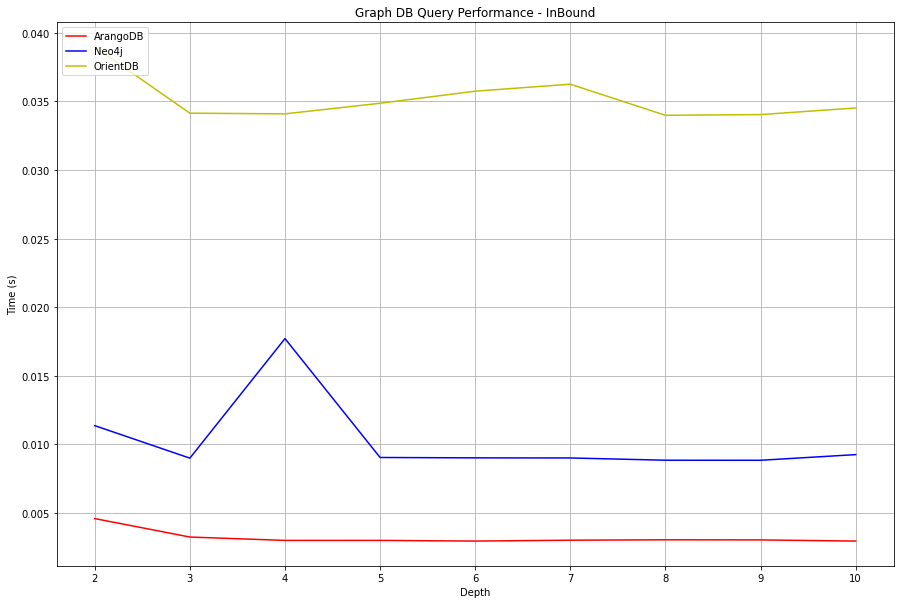

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.xlabel("Depth")
plt.ylabel("Time (s)")
plt.title("Graph DB Query Performance - InBound")
depth = [2,3,4,5,6,7,8,9,10]
plt.plot(depth, arango, 'r',label='ArangoDB')
plt.plot(depth, neo, 'b',label='Neo4j')
plt.plot(depth, orient, 'y',label='OrientDB') 
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

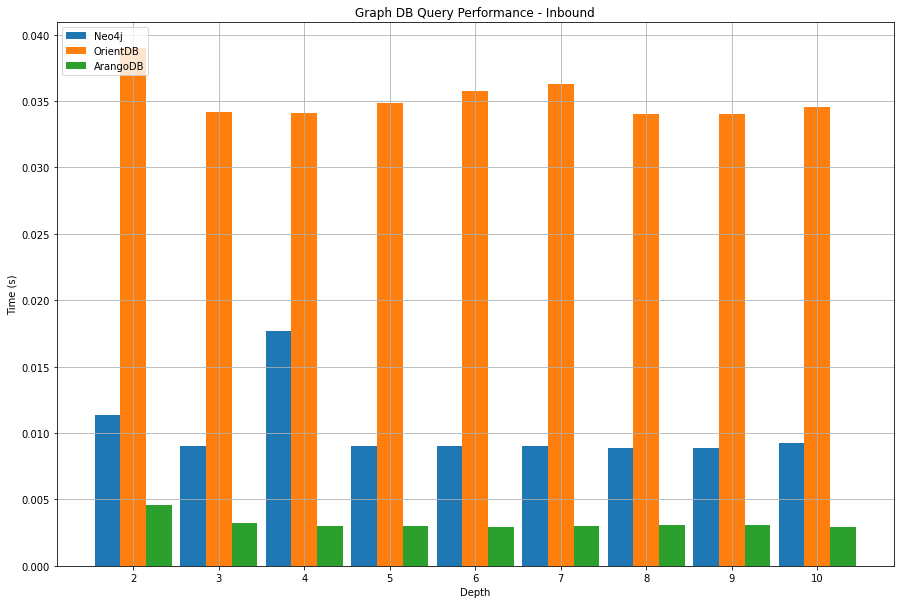

In [17]:
plt.figure(figsize=(15, 10))
w=0.3
plt.xlabel("Depth")
plt.ylabel("Time (s)")
plt.title("Graph DB Query Performance - Inbound")
depth = [2,3,4,5,6,7,8,9,10]

bar = np.arange(len(depth))
bar1= [i+w for i in bar]
bar2= [i-w for i in bar]
plt.bar(bar2, neo, w,label='Neo4j')
plt.bar(bar, orient, w,label='OrientDB')
plt.bar(bar1, arango, w,label='ArangoDB')
plt.xticks(bar,depth)
plt.legend(loc="upper left")
plt.grid(True)
plt.show()